In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download "divyanshrai/handwritten-signatures"

handwritten-signatures.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip 'handwritten-signatures.zip'

Archive:  handwritten-signatures.zip
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100001.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100002.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100003.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100004.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100005.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100006.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100007.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100008.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100009.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100010.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100011.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100012.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/021

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


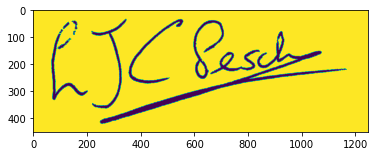

In [ ]:
import matplotlib.pyplot as plt
img = plt.imread('/content/sample_signature/sample_Signature/forged/NFI-00301001.png')
plt.imshow(img)

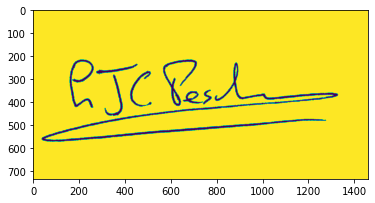

In [ ]:
img1 = plt.imread('/content/sample_Signature/sample_Signature/genuine/NFI-00101001.png')
plt.imshow(img1)

In [ ]:
import glob
gen = [glob.glob('/content/Dataset_Signature_Final/Dataset/dataset1/real/*.*'),
       glob.glob('/content/Dataset_Signature_Final/Dataset/dataset1/rea2/*.*'),
       glob.glob('/content/Dataset_Signature_Final/Dataset/dataset1/rea3/*.*'),
       glob.glob('/content/Dataset_Signature_Final/Dataset/dataset1/rea4/*.*')]
                 
forg = [glob.glob('/content/Dataset_Signature_Final/Dataset/dataset1/forge/*.*'),
        glob.glob('/content/Dataset_Signature_Final/Dataset/dataset2/forge/*.*'),
        glob.glob('/content/Dataset_Signature_Final/Dataset/dataset3/forge/*.*'),
        glob.glob('/content/Dataset_Signature_Final/Dataset/dataset4/forge/*.*')]

In [ ]:
import glob
import keras
import cv2
import tensorflow as tf

In [ ]:
train_data = []
train_labels = []

test_data = []
test_labels = []
for data in range(len(gen)):
    for i in gen[data]:
        if data == 3:
            image = cv2.imread(i)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            test_data.append(image)
            test_labels.append(0)
        else:
            image = cv2.imread(i)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            train_data.append(image)
            train_labels.append(0) #genuine = 0, genuine -yes-0
        
for data in range(len(forg)):
    for j in forg[data]:
        if data == 3:
            image = cv2.imread(j)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            test_data.append(image)
            test_labels.append(1)
        else:
            image = cv2.imread(j)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            train_data.append(image)
            train_labels.append(1) #forged = 1, genuine-no-1

train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)


test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)


In [ ]:
train_data.shape

(330, 224, 224, 3)

In [ ]:
from sklearn.utils import shuffle
train_data,train_labels = shuffle(train_data,train_labels)

test_data,test_labels = shuffle(test_data,test_labels)

In [ ]:
pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix as CM
from keras.optimizers import Adam

network = Sequential()

network.add(Conv2D(64,(3,3),input_shape=(224,224,3),activation='relu'))
network.add(MaxPooling2D(3,3))
network.add(Conv2D(32,(3,3),activation='relu'))
network.add(MaxPooling2D(2,2))
network.add(Flatten())
network.add(Dense(128,activation = 'relu'))
network.add(Dropout(rate=0.3))
network.add(Dense(2,activation = 'softmax'))

network.compile(optimizer=Adam(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])
network.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 flatten_20 (Flatten)        (None, 41472)             0         
                                                                 
 dense_42 (Dense)            (None, 128)             

In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

callback_early_stop_reduceLROnPlateau=[earlyStopping]


In [ ]:
EPOCHS = 5
BS = 1
progess = network.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=callback_early_stop_reduceLROnPlateau,validation_split=.05)

Epoch 1/5
313/313 [==============================] - 40s 126ms/step - loss: 0.7569 - accuracy: 0.8179 - val_loss: 0.5491 - val_accuracy: 0.8235
Epoch 2/5
313/313 [==============================] - 42s 133ms/step - loss: 0.7989 - accuracy: 0.8179 - val_loss: 0.5048 - val_accuracy: 0.8235
Epoch 3/5
313/313 [==============================] - 43s 137ms/step - loss: 0.8257 - accuracy: 0.8179 - val_loss: 0.4882 - val_accuracy: 0.8235
Epoch 4/5
313/313 [==============================] - 39s 125ms/step - loss: 0.5528 - accuracy: 0.8179 - val_loss: 0.4862 - val_accuracy: 0.8235
Epoch 5/5
313/313 [==============================] - 35s 112ms/step - loss: 0.6698 - accuracy: 0.8179 - val_loss: 0.4673 - val_accuracy: 0.8235


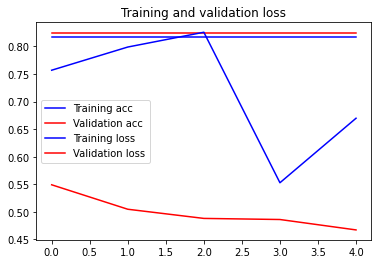

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [ ]:
pred = network.predict(test_data)

3/3 [==============================] - 2s 611ms/step


In [ ]:
pred#[prob of genuine, forged]

array([[0.35602257, 0.6439774 ],
       [0.35382053, 0.6461795 ],
       [0.35328978, 0.6467102 ],
       [0.33195525, 0.6680448 ],
       [0.33970824, 0.6602917 ],
       [0.35595617, 0.6440437 ],
       [0.351252  , 0.64874804],
       [0.32921475, 0.67078525],
       [0.357598  , 0.64240205],
       [0.36324906, 0.63675094],
       [0.3409187 , 0.65908134],
       [0.3213049 , 0.67869514],
       [0.34492192, 0.6550781 ],
       [0.34878016, 0.6512197 ],
       [0.36386245, 0.63613755],
       [0.35001194, 0.64998806],
       [0.3602515 , 0.63974845],
       [0.36124983, 0.63875014],
       [0.3571677 , 0.6428323 ],
       [0.35521203, 0.64478797],
       [0.353267  , 0.646733  ],
       [0.34971708, 0.650283  ],
       [0.3275135 , 0.67248654],
       [0.36197194, 0.63802797],
       [0.33993268, 0.6600673 ],
       [0.34485406, 0.65514594],
       [0.32447243, 0.6755275 ],
       [0.35803834, 0.64196163],
       [0.36766687, 0.6323332 ],
       [0.34768   , 0.65231997],
       [0.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

1.0

In [ ]:
def plot_sample(X,index):
 plt.figure(figsize=(15,2))
 plt.imshow(X[index])
 print('Probability of being a [genuine sign , forged sign] :')
 print(pred[index])


Probability of being a [genuine sign , forged sign] :
[0.357598   0.64240205]


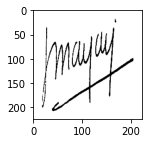

In [ ]:
plot_sample(test_data,8)
